<a href="https://colab.research.google.com/github/mahalaxmi2034/Spam_SMS_classifier/blob/main/spamSMSClassifier_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libs
import pandas as pd

df=pd.read_csv('/content/SMSSpamCollection',sep='\t',header=None,names=['label','message'])

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


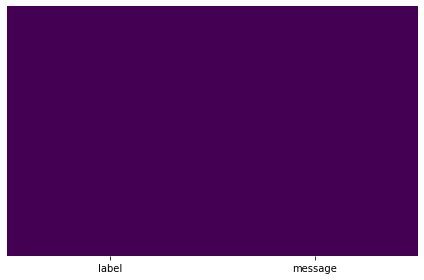

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [ ]:
#Data preprocessing
#method 1 already done in other datasets
#method 2
df['label']=df.label.map({'ham':0,'spam':1})

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from numpy.ma.core import count
#Bag of  words (BOW)
documents=['Hello, how are you!',
           'Win money, Win from home.'
           'Call me now.']

#applying 
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [ ]:
count_vector.fit(documents)

CountVectorizer()

In [ ]:
n=count_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(n)

['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money', 'now', 'win', 'you']


In [ ]:
doc_array=count_vector.transform(documents).toarray()

In [ ]:
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0]])

In [ ]:
freq_table = pd.DataFrame(data=doc_array,columns=n)

In [ ]:
freq_table

,are,call,from,hello,home,how,me,money,now,win,you
0,1,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,1,0,1,1,1,2,0


In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#loading the data
#X = df.iloc[:,-1:].values #independent message column
#Y = df.iloc[:,:-1].values  #dependent label column
'''
#METHOID 2  
X=np.array(df['message'])
Y=np.array(df['label'])'''

#method 3
X=df[['message']]
Y=df[['label']] 

In [ ]:
X

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
Y

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
#splits the data 
#X

In [ ]:
#splitting the dataset
#spliting he data set into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
X_train

,message
3075,Don know. I did't msg him recently.
1787,Do you know why god created gap between your f...
1614,Thnx dude. u guys out 2nite?
4304,Yup i'm free...
3266,"44 7732584351, Do you want a New Nokia 3510i c..."
...,...
789,"5 Free Top Polyphonic Tones call 087018728737,..."
968,What do u want when i come back?.a beautiful n...
1667,Guess who spent all last night phasing in and ...
3321,Eh sorry leh... I din c ur msg. Not sad alread...


In [ ]:
X_test

,message
2632,"URGENT! Your mobile No 077xxx WON a £2,000 Bon..."
454,Ok i will tell her to stay out. Yeah its been ...
983,Congrats! 2 mobile 3G Videophones R yours. cal...
1282,Am I the only one who doesn't stalk profiles?
4610,Y de asking like this.
...,...
4827,"Haha, just what I was thinkin"
5291,Xy trying smth now. U eat already? We havent...
3325,I don wake since. I checked that stuff and saw...
3561,Lol I know! Hey someone did a great inpersonat...


In [ ]:
X_train.shape

(4457, 1)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#transfrom the training into data freq vectors and return matrix
training_data=count_vector.fit_transform(X_train.values.flatten())

#transfrom the testing into data freq vectors and return matrix
testing_data=count_vector.transform(X_test.values.flatten())


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(training_data,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
Y_test=Y_test.values.flatten()
Y_train=Y_train.values.flatten()

In [ ]:
y_pred=model.predict(training_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_train.reshape(len(Y_train),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [ ]:
len(y_pred)

4457

In [ ]:
len(Y_test)

1115

In [ ]:
print("Predicted value for training data:",model.score(training_data,Y_train))
print("Training accuracy:",model.score(training_data,Y_train)*100)

Predicted value for training data: 0.9928202827013687
Training accuracy: 99.28202827013686


In [ ]:
print("Predicted value for testing data:",model.score(testing_data,Y_test))
print("Testing accuracy:",model.score(testing_data,Y_test)*100)

Predicted value for testing data: 0.9901345291479821
Testing accuracy: 99.01345291479821


In [ ]:
from sklearn.tree import DecisionTreeClassifier
modeldt=DecisionTreeClassifier()
modeldt.fit(training_data,Y_train)

DecisionTreeClassifier()

In [ ]:
print("Predicted value for training data:",modeldt.score(training_data,Y_train))
print("Training accuracy:",modeldt.score(training_data,Y_train)*100)

Predicted value for training data: 1.0
Training accuracy: 100.0


In [ ]:
print("Predicted value for testing data:",modeldt.score(testing_data,Y_test))
print("Testing accuracy:",modeldt.score(testing_data,Y_test)*100)

Predicted value for testing data: 0.9704035874439462
Testing accuracy: 97.04035874439462


In [ ]:
from sklearn.linear_model import LogisticRegression
modellr=LogisticRegression()
modellr.fit(training_data,Y_train)

LogisticRegression()

In [ ]:
print("Predicted value for training data:",modellr.score(training_data,Y_train))
print("Training accuracy:",modellr.score(training_data,Y_train)*100)

Predicted value for training data: 0.9975319721785955
Training accuracy: 99.75319721785955


In [ ]:
print("Predicted value for testing data:",modellr.score(testing_data,Y_test))
print("Testing accuracy:",modellr.score(testing_data,Y_test)*100)

Predicted value for testing data: 0.97847533632287
Testing accuracy: 97.847533632287


In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()
modelr.fit(training_data,Y_train)

RandomForestClassifier()

In [ ]:
print("Predicted value for training data:",modelr.score(training_data,Y_train))
print("Training accuracy:",modelr.score(training_data,Y_train)*100)

Predicted value for training data: 1.0
Training accuracy: 100.0


In [ ]:
print("Predicted value for testing data:",modelr.score(testing_data,Y_test))
print("Testing accuracy:",modelr.score(testing_data,Y_test)*100)

Predicted value for testing data: 0.9748878923766816
Testing accuracy: 97.48878923766816
